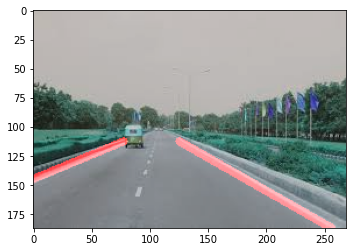

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def coord(img,line_para):
    slope,intercept=line_para
    y1=img.shape[0]
    y2=int(y1*(3/5))
    x1 = int((y1 -intercept)/slope)
    x2 = int((y2 -intercept)/slope)
    return np.array([x1,y1,x2,y2])

def average_slope_intercept(img,lines):
    left=[]
    right=[]
    for line in lines:
        x1,y1,x2,y2=line.reshape(4)
        para=np.polyfit((x1,x2),(y1,y2),1)#1st degree polynomial return slope and intercept
        slope=para[0]
        intercept=para[1]
        if slope < 0:
            left.append((slope,intercept))
        else:
            right.append((slope,intercept))
    left_avg=np.average(left,axis=0)
    right_avg=np.average(right,axis=0)
    left_line=coord(img,left_avg)
    right_line=coord(img,right_avg)
    
    return np.array((left_line,right_line))
    
    
def canny(img):
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    blur=cv2.GaussianBlur(gray,(5,5),0)
    canny = cv2.Canny(blur,50,150)
    return canny
#bitwise and operator

def display_lines(imag,lines):
    line_img=np.zeros_like(img)
    if lines is not None:
        for line in lines:
            x1,y1,x2,y2=line.reshape(4)
            cv2.line(line_img,(x1,y1),(x2,y2),(255,0,0),5)
    return line_img
def region_of_interest(img):
    height=img.shape[0]
    poly=np.array([[(0,145),(260,height),(110,90)]])
    mask=np.zeros_like(img)
    cv2.fillPoly(mask,poly,255)
    masked_img=cv2.bitwise_and(img,mask)
    return masked_img

img=cv2.imread("lane2.png")
lane_img=np.copy(img)
canny_img=canny(lane_img)
cropped_img=region_of_interest(canny_img)

lines=cv2.HoughLinesP(cropped_img,2,np.pi/180,100,np.array([]),minLineLength=40,maxLineGap=5)#single degree
avg_line=average_slope_intercept(lane_img,lines)
line_img=display_lines(lane_img,avg_line)
combo_img=cv2.addWeighted(lane_img,0.8,line_img,1,1)

# plt.imshow(combo_img)
plt.imshow(combo_img)
plt.show()
# cv2.imshow("Img",canny)
# cv2.waitKey(0) 